## Iterative pre-whitening examples
### KIC 7760680

In this notebook, we'll run the full Iterative pre-whitening (IPW) analysis of the Slowly Puslating B-type stars KIC 7760680 and then do some asteroseismolog with the results.

We'll just load up the data, and start the IPW, using a running window of $2~{\rm d^{-1}}$, and we'll extract the frequencies in order of highest SNR.

For this notebook, you'll need to download: [kic7760680_lc.dat](https://iacerasmus.github.io/ERASMUS2022/data/kic7760680_lc.dat)

In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

from pythia.utils.resampling import run_mean_smooth
from pythia.timeseries.periodograms import LS_periodogram
from pythia.timeseries.iterative_prewhitening import run_ipw

import matplotlib
matplotlib.use('nbagg')

plt.rcParams.update({
    "text.usetex": True,
        "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
plt.rcParams.update({
    "pgf.rcfonts": False,
    "pgf.texsystem": "pdflatex",
    "pgf.preamble": "\n".join([
         r"\usepackage{amsmath}",
         r"\usepackage[utf8x]{inputenc}",
         r"\usepackage[T1]{fontenc}",
         r"\usepackage{cmbright}",
    ]),
})

plt.rcParams['xtick.labelsize']=18
plt.rcParams['ytick.labelsize']=18

<IPython.core.display.Javascript object>


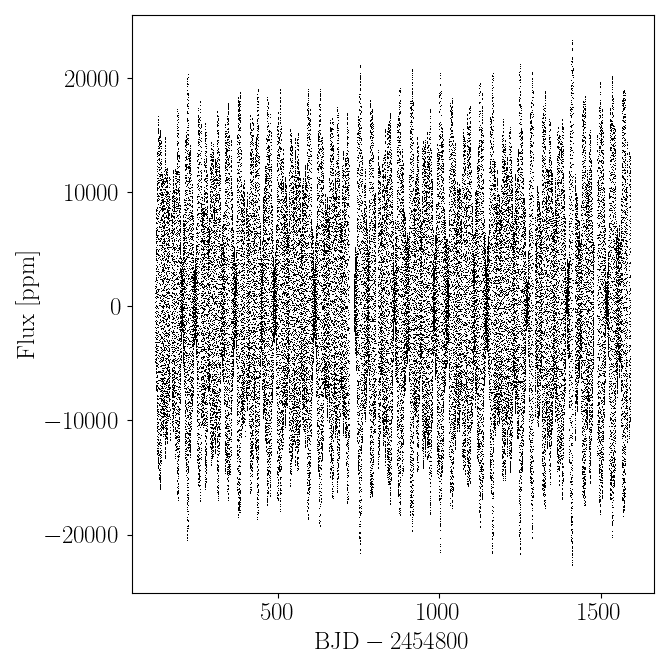

In [2]:
times, flux = np.loadtxt('kic7760680_lc.dat').T

fig, ax = plt.subplots(1,1,figsize=(6.69,6.69),num=1)
ax.plot(times, flux, 'k,')
ax.set_xlabel(r'${\rm BJD-2454800}$',fontsize=18)
ax.set_ylabel(r'${\rm Flux~[ppm]}$',fontsize=18)
fig.tight_layout()


In [3]:
nu, amp = LS_periodogram(times,flux-np.mean(flux))

<IPython.core.display.Javascript object>


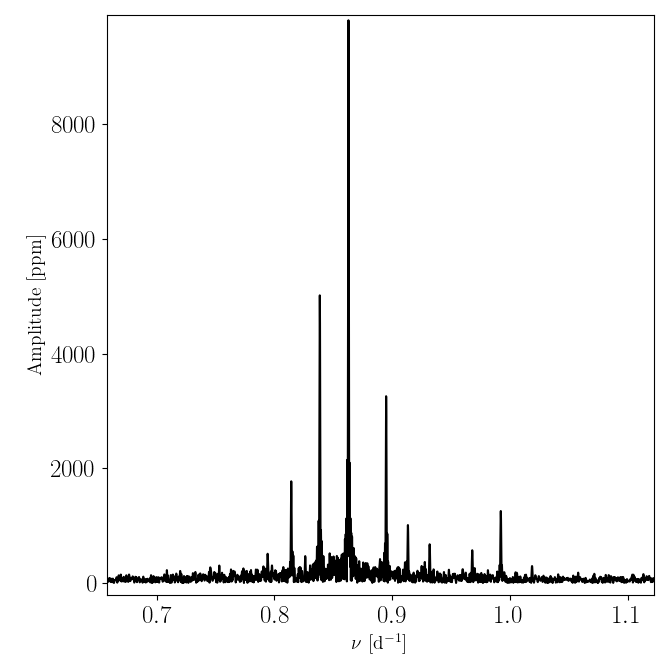

In [4]:
fig,ax = plt.subplots(1,1,figsize=(6.6957,6.6957),num=2)
ax.plot(nu,amp,'k-')
ax.set_xlabel(r'$\nu\,\,{\rm [d^{-1}]}$',fontsize=14)
ax.set_ylabel(r'${\rm Amplitude\,\,[ppm]}$',fontsize=14)
ax.set_xlim(0.,24.4)
fig.tight_layout()

As we can see from the light curve, there's a lot of beating going on. Seeing this, we know to expect at least a few closely separated frequencies!

In [6]:
yerr = 800* np.ones_like(times)
residuals, model, offsets, \
frequencies, amplitudes, \
phases, stop_criteria, noise_level = run_ipw(times,flux-np.mean(flux), yerr, snr_stop_criteria=5.6, 
                                             order_by_snr=True, use_snr_window=True, snr_window=2.,maxiter=50)


print('The IPW analysis has found {:d} significant frequencies'.format(len(frequencies)))

optimizing logp for variables: [phase]


message: Desired error not necessarily achieved due to precision loss.
logp: -7260872.297874538 -> -1671924.995068082
optimizing logp for variables: [offset, phase, amp, nu]


message: Desired error not necessarily achieved due to precision loss.
logp: -1671924.995068082 -> -1669778.3902996588
optimizing logp for variables: [phase]


message: Desired error not necessarily achieved due to precision loss.
logp: -2629240.008119801 -> -1019200.5716668499


optimizing logp for variables: [phase, amp, nu]


message: Desired error not necessarily achieved due to precision loss.
logp: -1019200.5716668499 -> -1018167.7931593189
optimizing logp for variables: [phase]


message: Desired error not necessarily achieved due to precision loss.
logp: -723758.8379458919 -> -722092.2408319736


optimizing logp for variables: [phase, amp, nu]


message: Desired error not necessarily achieved due to precision loss.
logp: -722092.2408319736 -> -720551.8804129795
optimizing logp for variables: [phase]


message: Optimization terminated successfully.
logp: -958031.940446697 -> -640644.2495088229


optimizing logp for variables: [phase, amp, nu]


message: Desired error not necessarily achieved due to precision loss.
logp: -640644.2495088229 -> -640520.0918446616
optimizing logp for variables: [phase]


message: Optimization terminated successfully.
logp: -605741.4034953549 -> -590615.5222008128


optimizing logp for variables: [phase, amp, nu]


message: Desired error not necessarily achieved due to precision loss.
logp: -590615.5222008128 -> -590552.0340929527
optimizing logp for variables: [phase]


message: Optimization terminated successfully.
logp: -571015.6509549952 -> -568117.00210612


optimizing logp for variables: [phase, amp, nu]


message: Desired error not necessarily achieved due to precision loss.
logp: -568117.00210612 -> -568113.7957271716
optimizing logp for variables: [phase]


message: Desired error not necessarily achieved due to precision loss.
logp: -581728.0508242999 -> -562631.1501428802
optimizing logp for variables: [phase, amp, nu]


message: Desired error not necessarily achieved due to precision loss.
logp: -562631.1501428802 -> -562613.5319931646
optimizing logp for variables: [phase]


message: Optimization terminated successfully.
logp: -591080.3080560573 -> -552869.2502105074


optimizing logp for variables: [phase, amp, nu]


message: Desired error not necessarily achieved due to precision loss.
logp: -552869.2502105074 -> -552864.4883334044
optimizing logp for variables: [phase]


message: Optimization terminated successfully.
logp: -574176.1049680853 -> -545344.6181616096


optimizing logp for variables: [phase, amp, nu]


message: Desired error not necessarily achieved due to precision loss.
logp: -545344.6181616096 -> -545341.8825149833
optimizing logp for variables: [phase]


message: Desired error not necessarily achieved due to precision loss.
logp: -551697.2039249521 -> -539678.2315184359
optimizing logp for variables: [phase, amp, nu]


message: Desired error not necessarily achieved due to precision loss.
logp: -539678.2315184359 -> -539667.7769316561
optimizing logp for variables: [phase]


message: Optimization terminated successfully.
logp: -536157.6588214439 -> -535178.816316071


optimizing logp for variables: [phase, amp, nu]


message: Desired error not necessarily achieved due to precision loss.
logp: -535178.816316071 -> -535176.3976091627


optimizing logp for variables: [phase]


message: Desired error not necessarily achieved due to precision loss.
logp: -531981.9290107794 -> -531950.8195021802
optimizing logp for variables: [phase, amp, nu]


message: Desired error not necessarily achieved due to precision loss.
logp: -531950.8195021802 -> -531948.6369258434
optimizing logp for variables: [phase]


message: Desired error not necessarily achieved due to precision loss.
logp: -535749.1678351221 -> -530443.8373405773
optimizing logp for variables: [phase, amp, nu]


message: Desired error not necessarily achieved due to precision loss.
logp: -530443.8373405773 -> -530439.3096556187
optimizing logp for variables: [phase]


message: Desired error not necessarily achieved due to precision loss.
logp: -539618.8533539425 -> -527343.1585583071
optimizing logp for variables: [phase, amp, nu]


message: Desired error not necessarily achieved due to precision loss.
logp: -527343.1585583071 -> -527334.720826523


optimizing logp for variables: [phase]


message: Desired error not necessarily achieved due to precision loss.
logp: -524864.6590234798 -> -524831.1614565888
optimizing logp for variables: [phase, amp, nu]


message: Desired error not necessarily achieved due to precision loss.
logp: -524831.1614565888 -> -524824.910636929
optimizing logp for variables: [phase]


message: Desired error not necessarily achieved due to precision loss.
logp: -529912.9764688503 -> -522989.3774587142
optimizing logp for variables: [phase, amp, nu]


message: Desired error not necessarily achieved due to precision loss.
logp: -522989.3774587142 -> -522989.37704301847


optimizing logp for variables: [phase]


message: Optimization terminated successfully.
logp: -525572.1178072355 -> -521328.5319760245


optimizing logp for variables: [phase, amp, nu]


message: Desired error not necessarily achieved due to precision loss.
logp: -521328.5319760245 -> -521326.9703316791
optimizing logp for variables: [phase]


message: Desired error not necessarily achieved due to precision loss.
logp: -523361.03233033686 -> -520147.68883544963
optimizing logp for variables: [phase, amp, nu]


message: Desired error not necessarily achieved due to precision loss.
logp: -520147.68883544963 -> -520147.03418733197


optimizing logp for variables: [phase]


message: Optimization terminated successfully.
logp: -521422.6360401556 -> -519656.7720431299


optimizing logp for variables: [phase, amp, nu]


message: Desired error not necessarily achieved due to precision loss.
logp: -519656.7720431299 -> -519656.40367761656
optimizing logp for variables: [phase]


message: Optimization terminated successfully.
logp: -520613.3820687486 -> -519175.70606816746


optimizing logp for variables: [phase, amp, nu]


message: Desired error not necessarily achieved due to precision loss.
logp: -519175.70606816746 -> -519175.3883600899
optimizing logp for variables: [phase]


message: Desired error not necessarily achieved due to precision loss.
logp: -519204.8353657633 -> -519168.0966461797
optimizing logp for variables: [phase, amp, nu]


message: Desired error not necessarily achieved due to precision loss.
logp: -519168.0966461797 -> -519168.08674573875
optimizing logp for variables: [phase]


message: Optimization terminated successfully.
logp: -518118.3801198888 -> -517851.65730466094


optimizing logp for variables: [phase, amp, nu]


message: Desired error not necessarily achieved due to precision loss.
logp: -517851.65730466094 -> -517851.6339798285
optimizing logp for variables: [phase]


message: Desired error not necessarily achieved due to precision loss.
logp: -518484.61235120887 -> -517631.8212742009
optimizing logp for variables: [phase, amp, nu]


message: Desired error not necessarily achieved due to precision loss.
logp: -517631.8212742009 -> -517631.59872658044
optimizing logp for variables: [phase]


message: Optimization terminated successfully.
logp: -517273.40419324674 -> -517192.11390627845


optimizing logp for variables: [phase, amp, nu]


message: Desired error not necessarily achieved due to precision loss.
logp: -517192.11390627845 -> -517191.06140850164


optimizing logp for variables: [phase]


message: Desired error not necessarily achieved due to precision loss.
logp: -517035.6355021807 -> -516586.81567514804
optimizing logp for variables: [phase, amp, nu]


message: Desired error not necessarily achieved due to precision loss.
logp: -516586.81567514804 -> -516586.45960462035
optimizing logp for variables: [phase]


message: Desired error not necessarily achieved due to precision loss.
logp: -516424.5252441514 -> -516361.393409179
optimizing logp for variables: [phase, amp, nu]


message: Desired error not necessarily achieved due to precision loss.
logp: -516361.393409179 -> -516361.3930323308


optimizing logp for variables: [phase]


message: Desired error not necessarily achieved due to precision loss.
logp: -515776.8866790071 -> -515343.7037343121
optimizing logp for variables: [phase, amp, nu]


message: Desired error not necessarily achieved due to precision loss.
logp: -515343.7037343121 -> -515343.6560935002
optimizing logp for variables: [phase]


message: Desired error not necessarily achieved due to precision loss.
logp: -517044.391617473 -> -514759.98684579146
optimizing logp for variables: [phase, amp, nu]


message: Desired error not necessarily achieved due to precision loss.
logp: -514759.98684579146 -> -514759.54104600195
optimizing logp for variables: [phase]


message: Desired error not necessarily achieved due to precision loss.
logp: -514434.37233195256 -> -514044.7458895987
optimizing logp for variables: [phase, amp, nu]


message: Desired error not necessarily achieved due to precision loss.
logp: -514044.7458895987 -> -514044.32740441075
optimizing logp for variables: [phase]


message: Desired error not necessarily achieved due to precision loss.
logp: -514043.44810267317 -> -514042.8704358363
optimizing logp for variables: [phase, amp, nu]


message: Desired error not necessarily achieved due to precision loss.
logp: -514042.8704358363 -> -514042.83583737793
optimizing logp for variables: [phase]


message: Optimization terminated successfully.
logp: -513749.8119974324 -> -513651.8968973149


optimizing logp for variables: [phase, amp, nu]


message: Desired error not necessarily achieved due to precision loss.
logp: -513651.8968973149 -> -513651.2743893275
optimizing logp for variables: [phase]


message: Desired error not necessarily achieved due to precision loss.
logp: -514047.72386729263 -> -513288.3009250919
optimizing logp for variables: [phase, amp, nu]


message: Desired error not necessarily achieved due to precision loss.
logp: -513288.3009250919 -> -513287.7228334766
optimizing logp for variables: [phase]


message: Desired error not necessarily achieved due to precision loss.
logp: -513988.9844317713 -> -512928.28090607986
optimizing logp for variables: [phase, amp, nu]


message: Desired error not necessarily achieved due to precision loss.
logp: -512928.28090607986 -> -512928.2722676203


optimizing logp for variables: [phase]


message: Desired error not necessarily achieved due to precision loss.
logp: -513785.8272544636 -> -512579.8532949145
optimizing logp for variables: [phase, amp, nu]


message: Desired error not necessarily achieved due to precision loss.
logp: -512579.8532949145 -> -512579.8119443576
optimizing logp for variables: [phase]


message: Optimization terminated successfully.
logp: -512428.3079829406 -> -512215.5121609659


optimizing logp for variables: [phase, amp, nu]


message: Desired error not necessarily achieved due to precision loss.
logp: -512215.5121609659 -> -512215.4952955969
optimizing logp for variables: [phase]


message: Desired error not necessarily achieved due to precision loss.
logp: -512207.16637691273 -> -511889.05531623296
optimizing logp for variables: [phase, amp, nu]


message: Desired error not necessarily achieved due to precision loss.
logp: -511889.05531623296 -> -511888.48904892907
optimizing logp for variables: [phase]


message: Desired error not necessarily achieved due to precision loss.
logp: -512112.3546857303 -> -511568.66496960697
optimizing logp for variables: [phase, amp, nu]


message: Desired error not necessarily achieved due to precision loss.
logp: -511568.66496960697 -> -511567.73620783
optimizing logp for variables: [phase]


message: Optimization terminated successfully.
logp: -511457.49260985904 -> -511445.25952037104


optimizing logp for variables: [phase, amp, nu]


message: Desired error not necessarily achieved due to precision loss.
logp: -511445.25952037104 -> -511445.2585780439


optimizing logp for variables: [phase]


message: Desired error not necessarily achieved due to precision loss.
logp: -512250.380387578 -> -511141.9884818103
optimizing logp for variables: [phase, amp, nu]


message: Desired error not necessarily achieved due to precision loss.
logp: -511141.9884818103 -> -511141.7164506072
optimizing logp for variables: [phase]


message: Desired error not necessarily achieved due to precision loss.
logp: -511374.3262521018 -> -511063.90358172654
optimizing logp for variables: [phase, amp, nu]


message: Desired error not necessarily achieved due to precision loss.
logp: -511063.90358172654 -> -511063.8822380181
optimizing logp for variables: [phase]


message: Optimization terminated successfully.
logp: -511064.1177674954 -> -511063.81056835456


optimizing logp for variables: [phase, amp, nu]


message: Desired error not necessarily achieved due to precision loss.
logp: -511063.81056835456 -> -511063.78682142793
optimizing logp for variables: [phase]


message: Desired error not necessarily achieved due to precision loss.
logp: -511882.6488191165 -> -510782.32669151307
optimizing logp for variables: [phase, amp, nu]


message: Desired error not necessarily achieved due to precision loss.
logp: -510782.32669151307 -> -510782.2792442193
optimizing logp for variables: [phase]


message: Desired error not necessarily achieved due to precision loss.
logp: -510782.83140882984 -> -510782.7372546079
optimizing logp for variables: [phase, amp, nu]


message: Desired error not necessarily achieved due to precision loss.
logp: -510782.7372546079 -> -510782.7117870476
optimizing logp for variables: [phase]


message: Desired error not necessarily achieved due to precision loss.
logp: -511122.05034001736 -> -510659.8563464732
optimizing logp for variables: [phase, amp, nu]


message: Desired error not necessarily achieved due to precision loss.
logp: -510659.8563464732 -> -510659.70424241974
optimizing logp for variables: [phase]


message: Optimization terminated successfully.
logp: -510735.2233298169 -> -510634.8084649076


optimizing logp for variables: [phase, amp, nu]


message: Desired error not necessarily achieved due to precision loss.
logp: -510634.8084649076 -> -510634.805995267
optimizing logp for variables: [phase]


message: Desired error not necessarily achieved due to precision loss.
logp: -511313.5410064599 -> -510392.06613647455
optimizing logp for variables: [phase, amp, nu]


message: Desired error not necessarily achieved due to precision loss.
logp: -510392.06613647455 -> -510391.9428184697
optimizing logp for variables: [phase]


message: Desired error not necessarily achieved due to precision loss.
logp: -510571.7359856426 -> -510331.2674107338
optimizing logp for variables: [phase, amp, nu]


message: Desired error not necessarily achieved due to precision loss.
logp: -510331.2674107338 -> -510331.2310220168
optimizing logp for variables: [phase]


message: Optimization terminated successfully.
logp: -510450.11569274456 -> -510249.0526062218


optimizing logp for variables: [phase, amp, nu]


message: Desired error not necessarily achieved due to precision loss.
logp: -510249.0526062218 -> -510249.0137723321
optimizing logp for variables: [phase]


message: Optimization terminated successfully.
logp: -510592.10278456827 -> -510046.60649154


optimizing logp for variables: [phase, amp, nu]


message: Desired error not necessarily achieved due to precision loss.
logp: -510046.60649154 -> -510046.5864177699
optimizing logp for variables: [phase]


message: Desired error not necessarily achieved due to precision loss.
logp: -510050.29543516156 -> -510048.93405236007
optimizing logp for variables: [phase, amp, nu]


message: Desired error not necessarily achieved due to precision loss.
logp: -510048.93405236007 -> -510048.8790001046


Individually optimised sinusoids: 
Sinusoid 0: Frequency: 0.8628822725042647 Amplitude: 9818.381377096632 Phase: -1.0716513814775581
Sinusoid 1: Frequency: 0.8385268021180636 Amplitude: 5022.410009270108 Phase: 2.437522746730275
Sinusoid 2: Frequency: 0.8948468890159779 Amplitude: 3399.1617631600175 Phase: 0.702795258261359
Sinusoid 3: Frequency: 0.8143155075048418 Amplitude: 1762.4912040537752 Phase: -2.661475965230078
Sinusoid 4: Frequency: 0.992192866002341 Amplitude: 1393.1909258560406 Phase: 0.07077037027691974
Sinusoid 5: Frequency: 0.9133823678006227 Amplitude: 933.6402412096301 Phase: 0.26653910195770125
Sinusoid 6: Frequency: 1.8083245974924762 Amplitude: 462.20694904554705 Phase: 3.033488919786429
Sinusoid 7: Frequency: 0.931822457967053 Amplitude: 615.1443506142805 Phase: -2.235408297781298
Sinusoid 8: Frequency: 0.9678532595198092 Amplitude: 540.5181517578595 Phase: -2.9236724987271296
Sinusoid 9: Frequency: 0.7942523941279644 Amplitude: 469.36190182038274 Phase: -0.9980526

optimizing logp for variables: [phase]


message: Desired error not necessarily achieved due to precision loss.
logp: -8190401.1520855 -> -509644.6017178355
optimizing logp for variables: [offset, phase, amp, nu]


message: Desired error not necessarily achieved due to precision loss.
logp: -509644.6017178355 -> -509644.6017178355


The IPW analysis has found 50 significant frequencies


Now that it's run, let's take a look at the model, the residual signal, and the frequencies that we found.

In [7]:
print(' C + A*sin( 2*pi*f*(t-t0)+phi )')

outstr = '{} -- C: {:.6f} -- A: {:.6f} -- f: {:.6f} -- phi: {:.6f} -- SNR: {:.6f}'
for ii,freq in enumerate(frequencies):
    print(outstr.format(ii, offsets[ii], amplitudes[ii], freq, phases[ii],stop_criteria[ii]))


 C + A*sin( 2*pi*f*(t-t0)+phi )
0 -- C: 0.000000 -- A: 9818.381377 -- f: 0.862882 -- phi: -1.074124 -- SNR: 1313.796806
1 -- C: 0.000000 -- A: 5022.410009 -- f: 0.838527 -- phi: 2.430142 -- SNR: 669.808423
2 -- C: 0.000000 -- A: 3399.161763 -- f: 0.894847 -- phi: 0.696152 -- SNR: 459.455561
3 -- C: 0.000000 -- A: 1762.491204 -- f: 0.814316 -- phi: -2.681430 -- SNR: 234.659175
4 -- C: 0.000000 -- A: 1393.190926 -- f: 0.992193 -- phi: 0.074652 -- SNR: 205.458102
5 -- C: 0.000000 -- A: 933.640241 -- f: 0.913382 -- phi: 0.266015 -- SNR: 127.216304
6 -- C: 0.000000 -- A: 462.206949 -- f: 1.808325 -- phi: 3.036235 -- SNR: 123.145543
7 -- C: 0.000000 -- A: 615.144351 -- f: 0.931822 -- phi: -2.246794 -- SNR: 84.625707
8 -- C: 0.000000 -- A: 540.518152 -- f: 0.967853 -- phi: -2.903948 -- SNR: 76.972106
9 -- C: 0.000000 -- A: 469.361902 -- f: 0.794252 -- phi: -1.005886 -- SNR: 62.634519
10 -- C: 0.000000 -- A: 417.473972 -- f: 0.862240 -- phi: 0.125703 -- SNR: 55.857550
11 -- C: 0.000000 -- A: 3

<IPython.core.display.Javascript object>


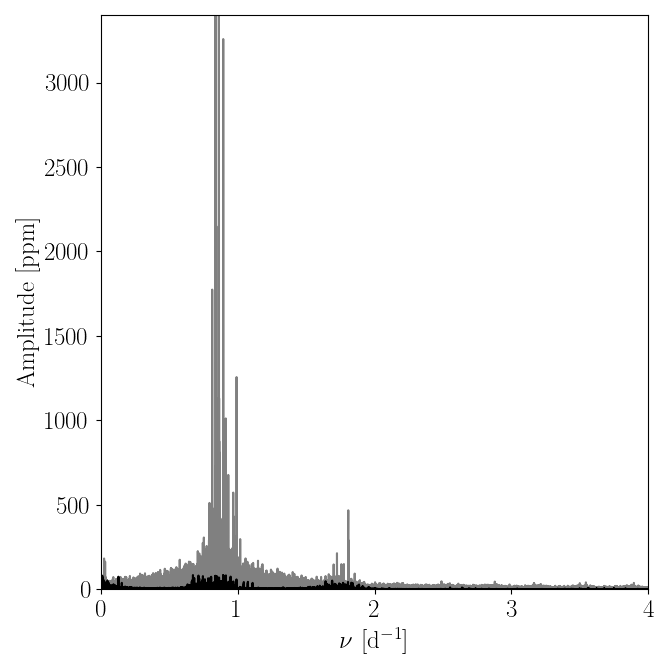

In [8]:
# np.savetxt('test.out',np.array([offsets,frequencies,amplitudes,phases]).T)

nu_, amp_ = LS_periodogram(times, residuals)
fig,ax = plt.subplots(1,1,figsize=(6.6957,6.6957), num=3)

#     ax.axvline(freq, linestyle='--',color='red',alpha=0.4)
#     ax.axhline(amplitudes[ii], linestyle='--',color='red',alpha=0.4)

ax.plot(nu, amp,'-',color='grey')
ax.plot(nu_,amp_,'k-')
ax.set_xlabel(r'$\nu\,\,{\rm [d^{-1}]}$',fontsize=18)
ax.set_ylabel(r'${\rm Amplitude\,\,[ppm]}$',fontsize=18)
ax.set_xlim(0., 4)
ax.set_ylim(0., 3400)
fig.tight_layout()

You might notice that we extracted 50significant frequenices, but that we were still at an SNR~10.
We certainly could have continued, but for the sake of the example, let's stop here. 

Clearly, there's a lot of sifnificant signal left, but let's see what we can do with what we've found.

<IPython.core.display.Javascript object>


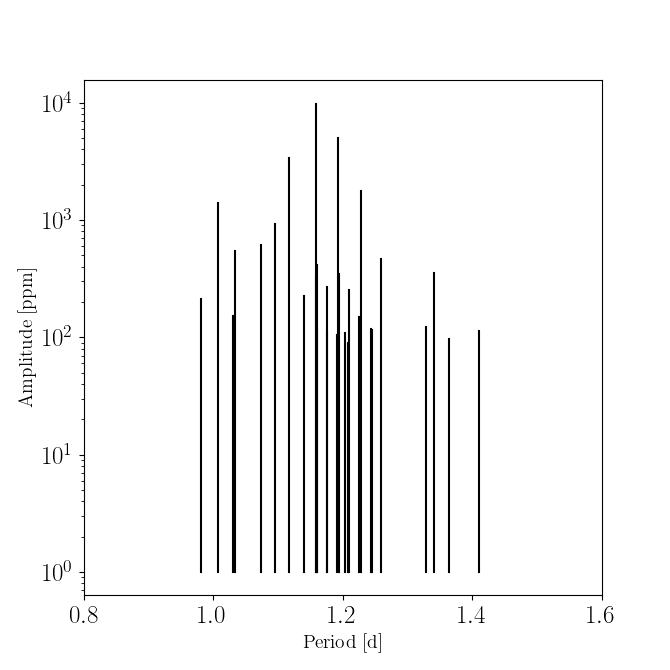

Text(0.5, 0, '${\\rm Period~[d]}$')

In [9]:
fig,ax = plt.subplots(1,1,figsize=(6.6957,6.6957), num=4)
for ii, freq_ in enumerate(frequencies):
    ax.plot([1./freq_,1./freq_], [1, amplitudes[ii]], color='black')

ax.set_yscale('log')
ax.set_xlim(0.8,1.6)
ax.set_ylabel(r'${\rm Amplitude~[ppm]}$',fontsize=14)
ax.set_xlabel(r'${\rm Period~[d]}$',fontsize=14)


According to asymptotic theory, we know that g-mode pulsations of constant ${(\ell, m)}$ and successive $n$ are expected to have an equidistant spacing in __period__.

However, effects like rotation and the presence of a chemical gradient can perturb g modes from having a constant period spacing.

<IPython.core.display.Javascript object>


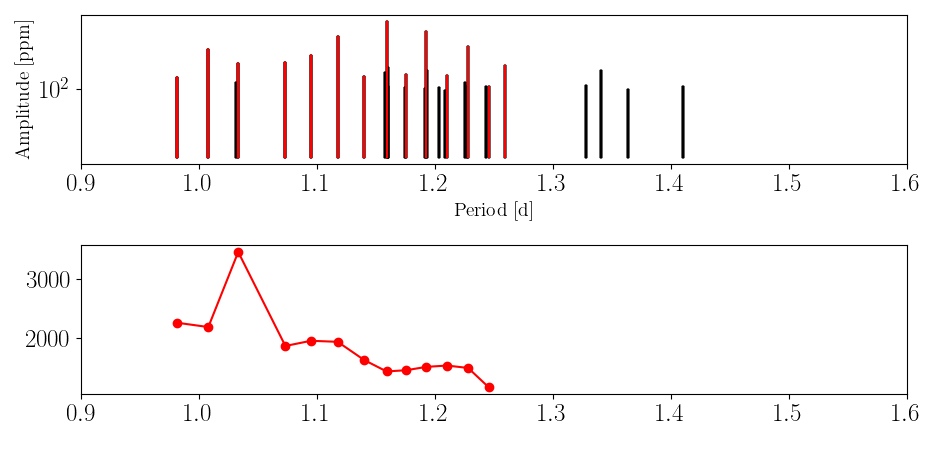

In [10]:
%matplotlib notebook
from ipywidgets import interact


def sort_on_x(x,y):
    zipped = list(zip(x,y))
    zipped.sort(key=lambda x:x[0])
    x,y = list(zip(*zipped))
    return np.array(x), np.array(y)


# plt.rcParams['backend'] = 'TkAgg'

periods = 1./frequencies
amplitudes_ = amplitudes[ ((periods>0.9) & (periods<1.7))]
periods_ = periods[ ((periods>0.9) & (periods<1.7))]

periods_, amplitudes_ = sort_on_x(periods_, amplitudes_)


fig,axes = plt.subplots(2,1,figsize=(6.6957*1.4,6.6957*0.7), num=5)

for ii, per in enumerate(periods_):
    axes[0].plot([per, per], [1., amplitudes_[ii]], color='black')

axes[0].set_yscale('log')
axes[0].set_xlim(0.9,1.6)
axes[0].set_ylabel(r'${\rm Amplitude~[ppm]}$',fontsize=14)
axes[0].set_xlabel(r'${\rm Period~[d]}$',fontsize=14)

axes[1].set_xlabel(r'${\rm Period~[d]}$',fontsize=15)
axes[1].set_ylabel(r'${\rm \Delta P~[s]}$',fontsize=15)

fig.tight_layout()

selected_periods, selected_amplitudes, delta_p, p_ = [], [], [], []

def onclick(event):

    global selected_periods 
    global selected_amplitudes
    if (event.button == 1):
        x_ = event.xdata
        y_ = event.ydata 
        dists = np.sqrt( (x_ - periods_)**2 )
        idf = np.argmin( dists )
        selected_periods.append(periods_[idf])
        selected_amplitudes.append(amplitudes_[idf])
     
    if (event.button != 1):
        xd = event.xdata
        yd = event.ydata 
        dists = np.sqrt( (xd - selected_periods)**2 )
        idr = np.argmin( dists )
        del selected_periods[idr]
        del selected_amplitudes[idr]
    
    for ii, per in enumerate(periods_):
        axes[0].plot([per, per], [1., amplitudes_[ii]], color='black')
    
    for ii, sp in enumerate(selected_periods):
        axes[0].plot([sp, sp], [1, selected_amplitudes[ii]], 'r-')

    if len(selected_periods)>1:
        global delta_p
        delta_p = []
        axes[1].clear()
        for ii, pi in enumerate(sorted(selected_periods[1:])):
            delta_p.append( 86400. * (pi - sorted(selected_periods)[ii] ) )
        axes[1].plot( sorted(selected_periods)[:-1], delta_p, 'r-o')
        axes[1].set_xlim(0.9, 1.6)
    
    fig.canvas.draw_idle()
    
# Create an hard reference to the callback not to be cleared by the garbage collector
ka = fig.canvas.mpl_connect('button_press_event', onclick)

In [133]:
selected_periods

[0.9816878216709778,
 1.007868564938503,
 1.0332144776741674,
 1.054176531583098,
 1.0731658069088497,
 1.094831732309381,
 1.1175096122864707,
 1.1399828631525313,
 1.158906645628251,
 1.175617436072121,
 1.1933455205783132]